# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_api_key

'acff65e2c0f92b1c69e83a3afd80af31'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['coihaique',
 'ustka',
 'hilo',
 'tatarsk',
 'mataura',
 'atuona',
 'avarua',
 'bethel',
 'saldanha',
 'forbes',
 'punta arenas',
 'soyo',
 'bredasdorp',
 'jining',
 'junin',
 'makurdi',
 'cap malheureux',
 'hermanus',
 'mitsamiouli',
 'faanui',
 'isla mujeres',
 'punta cardon',
 'busselton',
 'bengkulu',
 'timra',
 'albany',
 'belushya guba',
 'tevriz',
 'rio grande',
 'ushuaia',
 'kahului',
 'mocuba',
 'thompson',
 'lebu',
 'nikolskoye',
 'tongliao',
 'ahipara',
 'zhigansk',
 'dingle',
 'benjamin constant',
 'toftir',
 'cidreira',
 'osorio',
 'attawapiskat',
 'kaitangata',
 'barrow',
 'tiksi',
 'dafeng',
 'esperance',
 'saint anthony',
 'cape town',
 'jamestown',
 'sioux lookout',
 'tsihombe',
 'chokurdakh',
 'berlevag',
 'saleaula',
 'liverpool',
 'georgetown',
 'patacamaya',
 'ancud',
 'qaanaaq',
 'torbay',
 'port elizabeth',
 'hithadhoo',
 'saskylakh',
 'palabuhanratu',
 'grand gaube',
 'castro',
 'arraial do cabo',
 'rikitea',
 'victoria',
 'pemangkat',
 'omsukchan',
 'pisco',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).



In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"


# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" 
query_url 

'http://api.openweathermap.org/data/2.5/weather?appid=acff65e2c0f92b1c69e83a3afd80af31&q='

In [92]:
#create for loop through API 

#data format in API:
# {"coord":{"lon":-0.1257,"lat":51.5085},"weather":[{"id":721,"main":"Haze","description":"haze","icon":"50n"}],"base":"stations","main":{"temp":38.21,"feels_like":32.56,"temp_min":33.8,"temp_max":41,"pressure":1040,"humidity":75},"visibility":2000,"wind":{"speed":3.44,"deg":230},"clouds":{"all":0},"dt":1614393810,"sys":{"type":1,"id":1414,"country":"GB","sunrise":1614408600,"sunset":1614447406},"timezone":0,"id":2643743,"name":"London","cod":200}


#create list
city_openweather=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]




#for loop through city list
for city in cities:
    try:
        
        city_url = query_url + city + "&units=imperial"
        weather = requests.get(city_url).json()
       
        lat.append(weather["coord"]["lat"])
        lon.append(weather["coord"]["lon"])
        max_temp.append(weather["main"]["temp_max"])
        humidity.append(weather["main"]["humidity"])
        cloudiness.append(weather["clouds"]["all"])
        wind_speed.append(weather["wind"]["speed"])
        country.append(weather["sys"]["country"])
        date.append(weather["dt"])
        city_openweather.append(city)
        
        
    except:
        print(f"City not found: {city}")
       
        pass 
    
    



City not found: belushya guba
City not found: toftir
City not found: attawapiskat
City not found: tsihombe
City not found: saleaula
City not found: palabuhanratu
City not found: grand river south east
City not found: illoqqortoormiut
City not found: barentsburg
City not found: dolbeau
City not found: lolua
City not found: taolanaro
City not found: nizhneyansk
City not found: temaraia
City not found: tarudant
City not found: westpunt
City not found: mys shmidta
City not found: daxian
City not found: tumannyy
City not found: chagda
City not found: grand centre
City not found: viligili
City not found: malwan
City not found: sentyabrskiy
City not found: ciras
City not found: barbar
City not found: mirina
City not found: samusu
City not found: tungkang
City not found: amderma
City not found: burica
City not found: dzhusaly
City not found: ruidoso
City not found: paradwip
City not found: bolungarvik
City not found: vaitupu
City not found: artyk
City not found: ust-kamchatsk
City not found: k

In [93]:
len(city_openweather)

552

In [94]:
len(lat)

552

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
city_dict = {"City": city_openweather, 
             "Latitude": lat, 
             "Longitude": lon,
             "Max Temp": max_temp,         
             "Humidity": humidity,
             "Cloudiness": cloudiness,
             "Wind Speed": wind_speed,
             "Country": country,
             "Date": date}



In [96]:
city_data= pd.DataFrame(city_dict)
city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.5752,-72.0662,55.42,86,100,4.52,CL,1614569485
1,ustka,54.5805,16.8619,37.17,90,2,9.06,PL,1614569486
2,hilo,19.7297,-155.0900,69.80,83,90,9.22,US,1614569415
3,tatarsk,55.2190,75.9828,8.64,95,100,11.56,RU,1614569487
4,mataura,-46.1927,168.8643,70.00,75,53,11.01,NZ,1614569488
...,...,...,...,...,...,...,...,...,...
547,westport,41.1415,-73.3579,39.20,93,90,10.36,US,1614569670
548,moose factory,51.2585,-80.6094,10.40,85,90,14.97,CA,1614569670
549,mapiripan,2.8892,-72.1256,78.08,60,47,2.75,CO,1614569671
550,koscierzyna,54.1223,17.9812,33.80,100,90,9.22,PL,1614569671


In [98]:
city_data.DESCR

AttributeError: 'DataFrame' object has no attribute 'DESCR'

In [87]:
# city_data.to_csv('city data file.csv', index=True)

In [64]:
#export into csv

# city_data = "output_data/city data file.csv"

In [ ]:
# city_data.to_csv("output_data/city data file.csv", index=True)

In [74]:
# with open("city data file.csv","w") as file:
#     file.write(city_data + "\n")
    
# strongest_pokemon_df.to_csv("output/pokemon_rankings.csv", index=True)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%. - help understanding what this means



Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

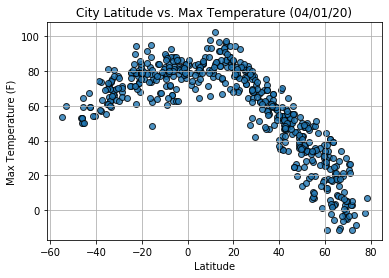

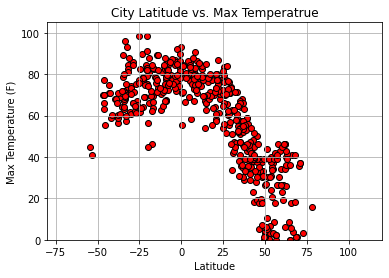

In [119]:
plt.scatter(city_data["Latitude"],city_data["Max Temp"], marker="o",color="red", edgecolor = "black")
plt.xlim(-80,120)
plt.ylim(0,105)
plt.title("City Latitude vs. Max Temperatrue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
#plt.save.fig("Latitude_temp")

## Latitude vs. Humidity Plot

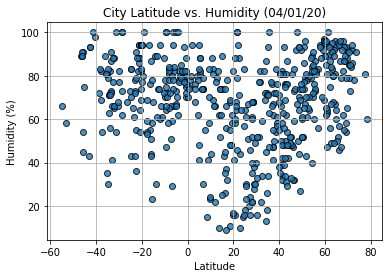

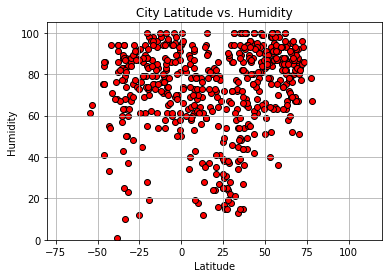

In [120]:
plt.scatter(city_data["Latitude"],city_data["Humidity"], marker="o",color="red", edgecolor = "black")
plt.xlim(-80,120)
plt.ylim(0,105)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()
#plt.save.fig("Latitude_temp")

## Latitude vs. Cloudiness Plot

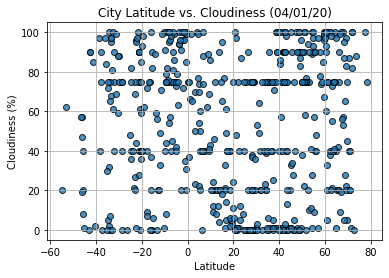

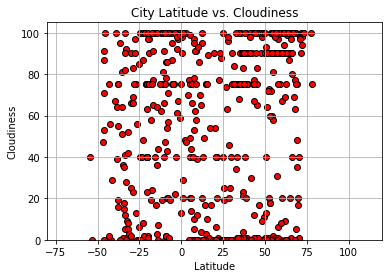

In [118]:
plt.scatter(city_data["Latitude"],city_data["Cloudiness"], marker="o",color="red", edgecolor = "black")
plt.xlim(-80,120)
plt.ylim(0,105)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()
#plt.save.fig("Latitude_temp")

## Latitude vs. Wind Speed Plot

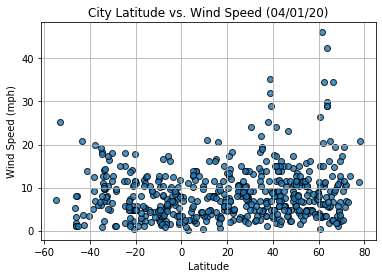

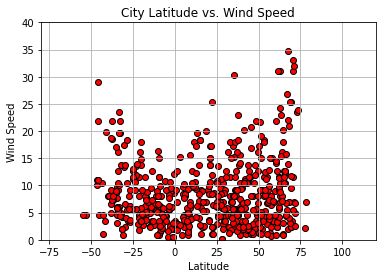

In [116]:
plt.scatter(city_data["Latitude"],city_data["Wind Speed"], marker="o",color="red", edgecolor = "black")
plt.xlim(-80,120)
plt.ylim(0,40)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()
#plt.save.fig("Latitude_temp")

## Linear Regression

In [149]:
#DEFINE THE NORTHERN HEMISPHERE AND PUT IN DF
#used class activity Portland Crime (Pandas day 2 activty 4)
Northern_Hemisphere = city_data.loc[city_data["Latitude"] > 0]
Northern_Hemisphere.head(10)


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ustka,54.5805,16.8619,37.17,90,2,9.06,PL,1614569486
2,hilo,19.7297,-155.0900,69.80,83,90,9.22,US,1614569415
3,tatarsk,55.2190,75.9828,8.64,95,100,11.56,RU,1614569487
7,bethel,41.3712,-73.4140,37.00,95,100,5.68,US,1614569488
13,jining,35.4050,116.5814,35.85,89,100,15.28,CN,1614569491
15,makurdi,7.7411,8.5121,73.89,73,5,5.10,NG,1614569491
20,isla mujeres,21.2311,-86.7310,80.01,78,40,13.80,MX,1614569493
21,punta cardon,11.6581,-70.2150,76.46,78,4,17.96,VE,1614569493
24,timra,62.4870,17.3257,39.99,75,100,5.75,SE,1614569494
25,albany,42.6001,-73.9662,37.99,75,100,1.99,US,1614569408


In [150]:
#DEFINE THE SOUTHERN HEMISPHERE AND PUT IN DF
#used class activity Portland Crime (Pandas day 2 activty 4)
Southern_Hemisphere = city_data.loc[city_data["Latitude"] < 0]
Southern_Hemisphere.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.5752,-72.0662,55.42,86,100,4.52,CL,1614569485
4,mataura,-46.1927,168.8643,70.00,75,53,11.01,NZ,1614569488
5,atuona,-9.8000,-139.0333,80.35,77,47,16.42,PF,1614569488
6,avarua,-21.2078,-159.7750,84.20,79,75,11.50,CK,1614569488
8,saldanha,-33.0117,17.9442,57.20,88,92,4.61,ZA,1614569489
9,forbes,-33.3833,148.0167,96.01,10,41,5.01,AU,1614569489
10,punta arenas,-53.1500,-70.9167,41.00,65,0,4.61,CL,1614569489
11,soyo,-6.1349,12.3689,79.70,86,100,10.80,AO,1614569490
12,bredasdorp,-34.5322,20.0403,68.00,88,36,4.61,ZA,1614569490
14,junin,-34.5838,-60.9433,72.00,89,0,9.80,AR,1614569491


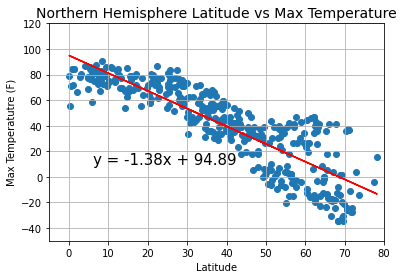

In [140]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-5,80)
plt.ylim(-50,120)
plt.title("Northern Hemisphere Latitude vs Max Temperature",  fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperatutre (F)")
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


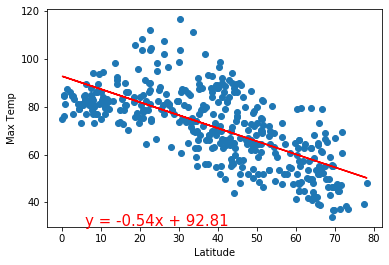

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


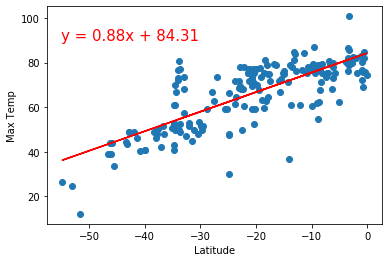

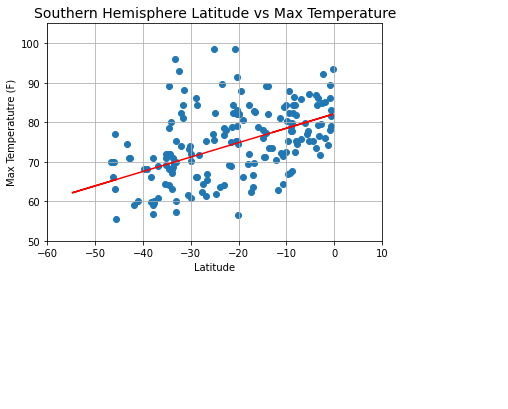

In [161]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-60,10)
plt.ylim(50,105)
plt.title("Southern Hemisphere Latitude vs Max Temperature",  fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperatutre (F)")
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


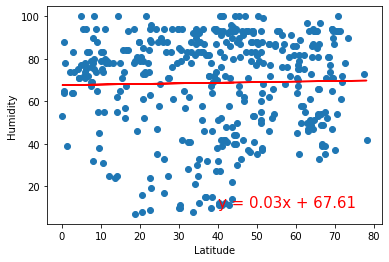

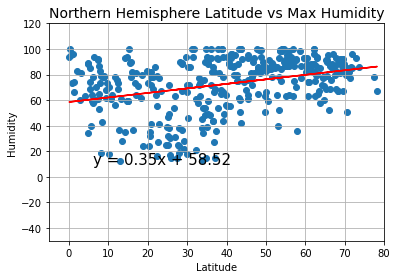

In [141]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-5,80)
plt.ylim(-50,120)
plt.title("Northern Hemisphere Latitude vs Max Humidity",  fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


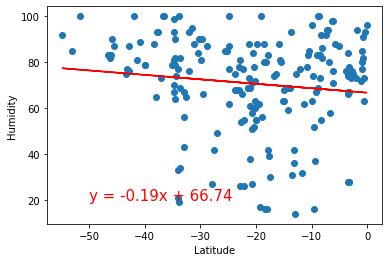

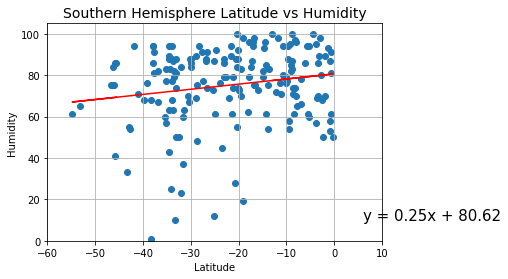

In [165]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-60,10)
plt.ylim(0,105)
plt.title("Southern Hemisphere Latitude vs Humidity",  fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


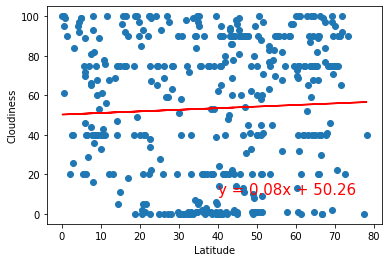

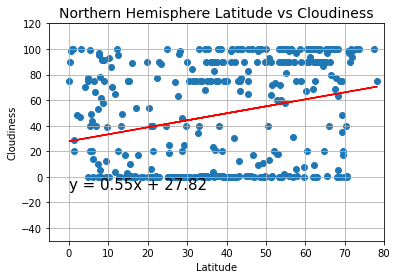

In [147]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-5,80)
plt.ylim(-50,120)
plt.title("Northern Hemisphere Latitude vs Cloudiness",  fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,-10),fontsize=15,color="black")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


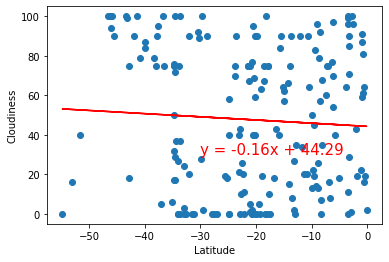

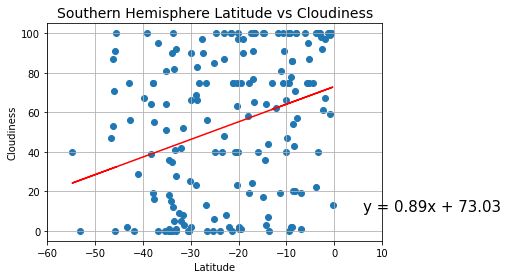

In [169]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-60,10)
plt.ylim(-5,105)
plt.title("Southern Hemisphere Latitude vs Cloudiness",  fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


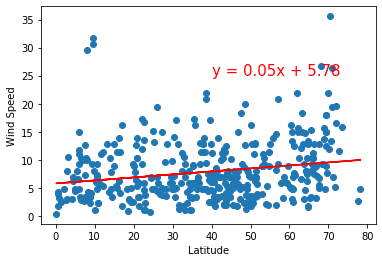

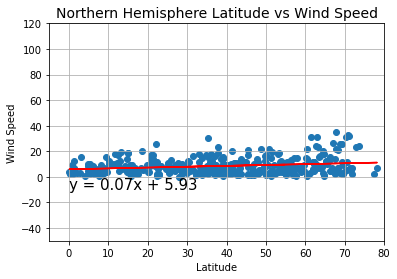

In [148]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-5,80)
plt.ylim(-50,120)
plt.title("Northern Hemisphere Latitude vs Wind Speed",  fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,-10),fontsize=15,color="black")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


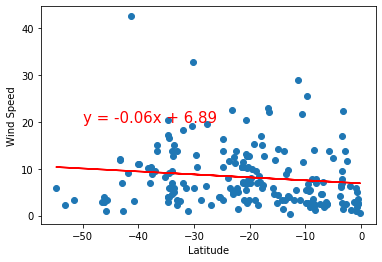

In [ ]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(-60,10)
plt.ylim(-5,105)
plt.title("Southern Hemisphere Latitude vs Wind Soeed",  fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.show()